# **Import necessary libaries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# **EDA**

In [56]:
# Load breast cancer dataset from scikit-learn
data = load_breast_cancer()

# Convert the dataset into a pandas DataFrame for easier handling
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Add the target column (0 = malignant, 1 = benign)
df['target'] = data.target

# Add a column with the target names (malignant/benign)
df['target_name'] = data.target_names[data.target]


In [57]:
# Display the shape of the dataset (number of samples and features)
print("Dataset shape:", df.shape)

# Display the number of malignant tumor samples (target = 0)
print("Number of malignant tumor samples:", (df['target'] == 0).sum())

# Display the number of benign tumor samples (target = 1)
print("Number of benign tumor samples:", (df['target'] == 1).sum())

# Display the first 5 rows to preview the data
df.head(5)


Dataset shape: (569, 32)
Number of malignant tumor samples: 212
Number of benign tumor samples: 357


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [58]:
# Show descriptive statistics for numerical features
df.describe().round(2)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


# **Data Preprocessing**

In [59]:
# Separate features and target
X = df.drop(['target', 'target_name'], axis=1).values  # Feature data
y = df['target'].values  # Target labels (0 = malignant, 1 = benign)
# Split the data: 70% for training, 30% for testing, with random seed and stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [60]:
# Check class distribution after split (avoid data leakage)
print("Train set distribution:", np.unique(y_train, return_counts=True))
print("Test set distribution:", np.unique(y_test, return_counts=True))

Train set distribution: (array([0, 1]), array([148, 250]))
Test set distribution: (array([0, 1]), array([ 64, 107]))


In [61]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on training data
X_test = scaler.transform(X_test)        # Apply the same scaling to test data


# **Model Definitio**

# **Model 1: Logistic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define and train the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train)

# Predict on test data
lr_pred = lr_model.predict(X_test)

# Evaluate accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", round(lr_accuracy, 4))


Logistic Regression Accuracy: 0.9883


# **Model 2: Decision Tree**

# Build and evaluate a Decision Tree model



In [63]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
dt_pred = dt_model.predict(X_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", round(dt_accuracy, 4))


Decision Tree Accuracy: 0.9181


# **Model 3: Random Forest**

# Build and evaluate a Random Forest model


In [64]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", round(rf_accuracy, 4))


Random Forest Accuracy: 0.9357


# **Model 4: Support Vector Machine (SVM)**

# Build and evaluate a Support Vector Machine model


In [65]:

from sklearn.svm import SVC

# Define and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
svm_pred = svm_model.predict(X_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", round(svm_accuracy, 4))


SVM Accuracy: 0.9825


# **Model 5: K-Nearest Neighbors(KNN)**

# Build and evaluate a K-Nearest Neighbors model


In [66]:

from sklearn.neighbors import KNeighborsClassifier

# Define and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict on test data
knn_pred = knn_model.predict(X_test)

# Evaluate accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", round(knn_accuracy, 4))


KNN Accuracy: 0.9591


# **Model Comparison (Accuracy Table and Plot)**

In [67]:
# Create a dictionary to store model names and their test accuracies
model_accuracies = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'SVM': svm_accuracy,
    'KNN': knn_accuracy
}

# Optional: print all accuracies nicely
for model, acc in model_accuracies.items():
    print(f"{model}: {round(acc, 4)}")


Logistic Regression: 0.9883
Decision Tree: 0.9181
Random Forest: 0.9357
SVM: 0.9825
KNN: 0.9591


In [68]:
# Convert to a DataFrame for better visualization
accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Test Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Test Accuracy', ascending=False)
display(accuracy_df)


,Test Accuracy
Logistic Regression,0.988304
SVM,0.982456
KNN,0.959064
Random Forest,0.935673
Decision Tree,0.918129


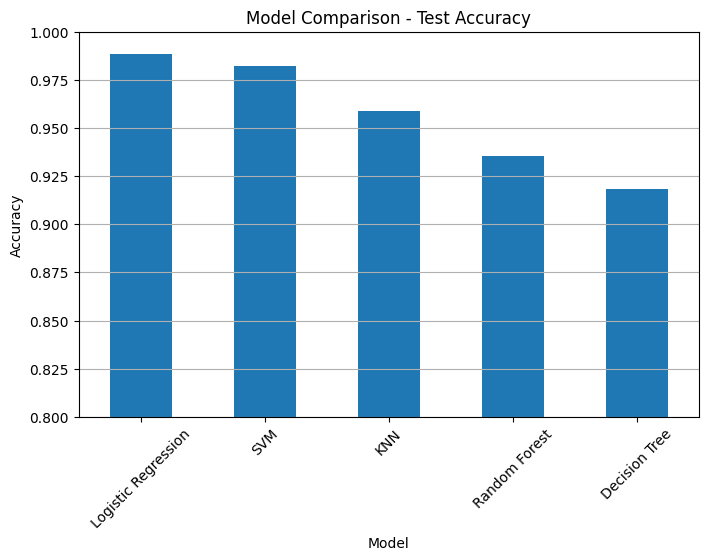

In [69]:
import matplotlib.pyplot as plt

# Bar plot to visualize model performances
accuracy_df.plot(kind='bar', legend=False, figsize=(8,5))
plt.title('Model Comparison - Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


# **Hyperparameter Tuning using Grid Search**

In [70]:
# Define the grid of hyperparameter C values to search
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(solver='liblinear', random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Extract the best model and its parameters
best_model = grid.best_estimator_
print("Best parameters from GridSearchCV:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_.round(4))


Best parameters from GridSearchCV: {'C': 1}
Best cross-validation accuracy: 0.9799


In [71]:
# Display accuracy scores for different C values tested in GridSearch
results = pd.DataFrame(grid.cv_results_)
print("\\nDetailed results for each C value:")
print(results[['param_C', 'mean_test_score']])


\nDetailed results for each C value:
   param_C  mean_test_score
0     0.01         0.972373
1     0.10         0.979905
2     1.00         0.979937
3    10.00         0.962310
4   100.00         0.959810


# **Model Evaluation**

In [72]:
# Predict labels for test data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("\n Final Evaluation:")
print(f"Accuracy on test set: {accuracy:.4f}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))



 Final Evaluation:
Accuracy on test set: 0.9883

Confusion Matrix:
[[ 63   1]
 [  1 106]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



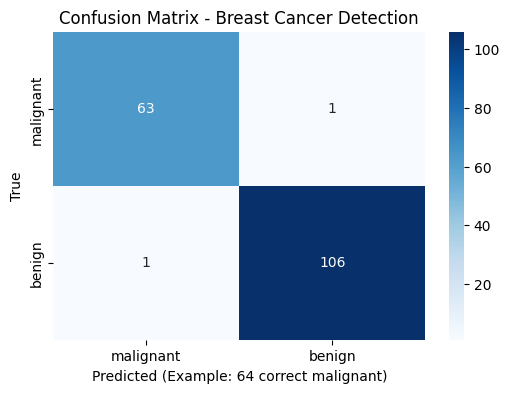

In [73]:
# Plot confusion matrix (example: rows=True, cols=Predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
           annot=True,
           fmt='d',
           cmap='Blues',
           xticklabels=data.target_names,  # x-axis: Predicted labels
           yticklabels=data.target_names)  # y-axis: True labels
plt.xlabel('Predicted (Example: 64 correct malignant)')
plt.ylabel('True')
plt.title('Confusion Matrix - Breast Cancer Detection')
plt.show()

## **Model Testing with New Samples**








In [74]:
# Select 5 samples for testing (simulating real new data)
new_samples = X_test[:5]
new_true = y_test[:5]

# Predict probabilities (example output: [[0.95, 0.05], ...])
new_probs = best_model.predict_proba(new_samples)

# Print results (example: "Sample 1 (True=malignant): Malignant=0.9500, Benign=0.0500")
print("\nPrediction probabilities for new samples:")
for i, (true_val, probs) in enumerate(zip(new_true, new_probs), start=1):
    true_label = data.target_names[true_val]
    print(f"Sample {i} (True={true_label}): Malignant={probs[0]:.4f}, Benign={probs[1]:.4f}")


Prediction probabilities for new samples:
Sample 1 (True=malignant): Malignant=0.9684, Benign=0.0316
Sample 2 (True=benign): Malignant=0.0512, Benign=0.9488
Sample 3 (True=benign): Malignant=0.0174, Benign=0.9826
Sample 4 (True=malignant): Malignant=0.9990, Benign=0.0010
Sample 5 (True=malignant): Malignant=0.7207, Benign=0.2793
